In [1]:
from math import pi
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cpl_main as cpl

In [2]:
team_ref = pd.read_csv('datasets/teams.csv')

In [3]:
year = input('enter the year: ')

enter the year: 2020


In [105]:
results = pd.read_csv(f'datasets/{year}/cpl-{year}-results.csv')
stats = pd.read_csv(f'datasets/{year}/cpl-{year}-stats.csv')
player_info = pd.read_csv(f'datasets/{year}/player-{year}-info.csv')

In [5]:
prev_rated_forwards = pd.read_csv(f'datasets/{year}/cpl-{year}-forwards.csv')
prev_rated_midfielders = pd.read_csv(f'datasets/{year}/cpl-{year}-midfielders.csv')
prev_rated_defenders = pd.read_csv(f'datasets/{year}/cpl-{year}-defenders.csv')
prev_rated_goalscorers = pd.read_csv(f'datasets/{year}/cpl-{year}-rated_goalscorers.csv')
prev_rated_keepers = pd.read_csv(f'datasets/{year}/cpl-{year}-keepers.csv')

In [6]:
if year == '2019':
    team_ref = team_ref[1:]
    results_old = results[:-7].copy()
else:
    results_old = results[results['hr'] != 'E'].copy()

In [7]:
results.head(5)

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links
0,II1,1,7,1,0,0,Forge FC,E,Cavalry FC,E,0,0,1-7-2020 Forge FC E 0-0 E Cavalry FC,Tim Hortons Field,https://canpl.ca/schedule
1,II2,1,7,1,0,0,Pacific FC,E,FC Edmonton,E,0,0,1-7-2020 Pacific FC E 0-0 E FC Edmonton,Westhills Stadium,https://canpl.ca/schedule
2,II3,1,7,1,0,0,York9 FC,E,HFX Wanderers FC,E,0,0,1-7-2020 York9 FC E 0-0 E HFX Wanderers FC,York Lions Stadium,https://canpl.ca/schedule
3,II4,1,7,1,0,0,York9 FC,E,Valour FC,E,0,0,1-7-2020 York9 FC E 0-0 E Valour FC,York Lions Stadium,https://canpl.ca/schedule
4,II5,1,7,1,0,0,Pacific FC,E,HFX Wanderers FC,E,0,0,1-7-2020 Pacific FC E 0-0 E HFX Wanderers FC,Westhills Stadium,https://canpl.ca/schedule


In [8]:
results_old.head(5)

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links


In [9]:
results_diff = pd.concat([results, results_old]).drop_duplicates(keep=False)

In [10]:
results_diff.head(2)

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links
0,II1,1,7,1,0,0,Forge FC,E,Cavalry FC,E,0,0,1-7-2020 Forge FC E 0-0 E Cavalry FC,Tim Hortons Field,https://canpl.ca/schedule
1,II2,1,7,1,0,0,Pacific FC,E,FC Edmonton,E,0,0,1-7-2020 Pacific FC E 0-0 E FC Edmonton,Westhills Stadium,https://canpl.ca/schedule


In [11]:
schedule = cpl.get_schedule(results_diff)
schedule

,game,home,away
0,II1,Forge FC,Cavalry FC
1,II2,Pacific FC,FC Edmonton
2,II3,York9 FC,HFX Wanderers FC
3,II4,York9 FC,Valour FC
4,II5,Pacific FC,HFX Wanderers FC
...,...,...,...
107,II108,Atletico Ottawa,Pacific FC
108,II109,Forge FC,Cavalry FC
109,II110,HFX Wanderers FC,FC Edmonton
110,II111,Atletico Ottawa,Valour FC


In [12]:
team1, team2, team3, team4, team5, team6, team7, team8 = cpl.get_team_files(schedule,team_ref)

In [13]:
print(team1, team2, team3, team4, team5, team6, team7, team8)

FFC CFC PFC FCE Y9 HFX Y9 VFC


In [14]:
standings = cpl.get_standings(results,1,team_ref)
if results_old.empty == True:
    standings_old = cpl.get_standings(results,1,team_ref)
else:
    standings_old = cpl.get_standings(results_old,1,team_ref)

In [15]:
standings

,rank,team,gp,pts,tpp,ppg,w,l,d,gd,gf,ga,gfh,gah,gfa,gaa
0,1,Atletico Ottawa,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,2,Cavalry FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
2,3,FC Edmonton,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
3,4,Forge FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
4,5,HFX Wanderers FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
5,6,Pacific FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
6,7,Valour FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
7,8,York9 FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0


In [16]:
standings_old

,rank,team,gp,pts,tpp,ppg,w,l,d,gd,gf,ga,gfh,gah,gfa,gaa
0,1,Atletico Ottawa,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,2,Cavalry FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
2,3,FC Edmonton,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
3,4,Forge FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
4,5,HFX Wanderers FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
5,6,Pacific FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
6,7,Valour FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
7,8,York9 FC,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0


In [17]:
def get_team_graphs(stats,standings):
    comparing = standings.sort_values(by=['team'])
    
    def get_column_overall(lst):
        data = stats[lst]
        data = data.groupby(['team']).sum()
        data['overall'] = data.sum(axis=1) / data.shape[1]
        data['overall'] = data['overall'] / data['overall'].max()
        data['overall'] = data['overall'] - 0.1
        data = data[['overall']]
        data = data.reset_index()
        data.pop('team')
        return data['overall']
    
    offense = get_column_overall(['team','goals','chances','assists','shots','s-target','passes','crosses','duels','tackles'])
    central = get_column_overall(['team','goals','assists','touches','passes','pass-acc','crosses','cross-acc','chances','duels','tackles'])
    defense = get_column_overall(['team','tackles','t-won','clearances','interceptions','duels','d-won'])
    keeping = get_column_overall(['team','cs','saves','shots faced','claimed crosses'])
    
    g_cols = ['chances','goals','assists','pass-acc','cross-acc','shots','s-target','s-box','s-out-box','clearances','interceptions','yellow','shots faced','claimed crosses','cs']
    team_mean = stats.copy()
    goals = stats[['team','goals']]
    assists = stats[['team','assists']]
    team_mean = team_mean.select_dtypes(include=['float'])
    team_mean.insert(0,'team',stats['team'])
    try:
        team_mean = team_mean.groupby(['team']).mean()
    except:
        teams = stats.team.unique()
        team_mean = pd.DataFrame(columns=['team','clean sheets','big chances','attacking plays','combination plays','accuracy','defending','chance creation','finishing'])
        team_mean['team'] = teams
        for col in team_mean.columns:
            if col == 'team':
                continue
            else:
                team_mean[col] = 0.5
        return team_mean

    team_mean = team_mean[g_cols]
    team_mean['claimed crosses'] = team_mean['claimed crosses'] * 15
    team_mean['cs'] = team_mean['cs'] * 100
    team_mean['goals'] = goals.groupby(['team']).sum()
    team_mean['assists'] = assists.groupby(['team']).sum()
    team_mean['big chances'] = (team_mean['goals'] + 2) / team_mean['chances']
    team_mean['attacking plays'] = (team_mean['assists'] + 2) / team_mean['chances']
    team_mean['combination plays'] = team_mean['assists'] / team_mean['goals'] * 100
    team_mean['offense'] = comparing['gf'].values / offense.values
    team_mean['midfield'] = comparing['gd'].values * central.values + comparing['gd'].max()
    team_mean['defending'] = 100 - (comparing['ga'].values * defense.values)
    team_mean['chance creation'] = (team_mean['shots'] + team_mean['s-box'] + team_mean['s-out-box']) * team_mean['s-target'] * 100
    team_mean['finishing'] = team_mean['chance creation'] * team_mean['goals']
    team_mean = team_mean.rename(columns={'cs':'clean sheets'})

    for col in team_mean.columns:
        if team_mean[col].max() > 1.0:
            team_mean[col] = team_mean[col] / team_mean[col].max()
        if team_mean[col].max() < 0.2:
            team_mean[col] = team_mean[col] * 5
        else:
            continue
    for col in team_mean.columns:
        team_mean[col] = team_mean[col] - 0.1
    
    team_mean = team_mean[['clean sheets','big chances','attacking plays','combination plays','offense','midfield','defending','chance creation','finishing']]
    team_mean = team_mean.reset_index()
    return team_mean

In [18]:
team_graphs = get_team_graphs(stats,standings)
team_graphs

,team,clean sheets,big chances,attacking plays,combination plays,accuracy,defending,chance creation,finishing
0,Atletico Ottawa,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,Cavalry FC,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,FC Edmonton,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,Forge FC,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,HFX Wanderers FC,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
5,Pacific FC,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
6,Valour FC,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
7,York9 FC,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [19]:
def make_radar(data,team_ref,year):
    team = data['team']
    info = team_ref[team_ref['team'] == team]
    colour1 = info['colour1'].values
    colour1 = colour1[0]
    colour2 = info['colour2'].values
    colour2 = colour2[0]
    # number of variable
    categories=list(team_graphs)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = data.drop('team').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    #plt.figure(figsize=(8,8))
    plt.figure(figsize=(8,8), dpi=80, facecolor='#343148',edgecolor='#343148')
    ax = plt.subplot(111, polar=True)
    ax.set_facecolor('#343148')

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='white', size=14)

    # Draw ylabels
    ax.set_title(data['team'], color=colour2, size=24)
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color='white', size=12)
    plt.ylim(0,1)
    # Plot data
    ax.plot(angles, values, linewidth=8, linestyle='solid', color=colour2)

    # Fill area
    ax.fill(angles, values, colour2, alpha=0.5)
    
    filename = f'static/images/{year}/cpl-{year}-{team}-radar.png'
    plt.savefig(filename, facecolor= '#343148',edgecolor='#343148')

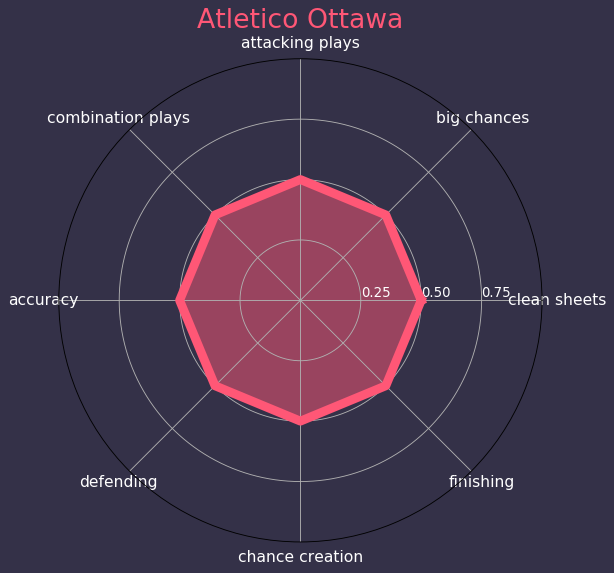

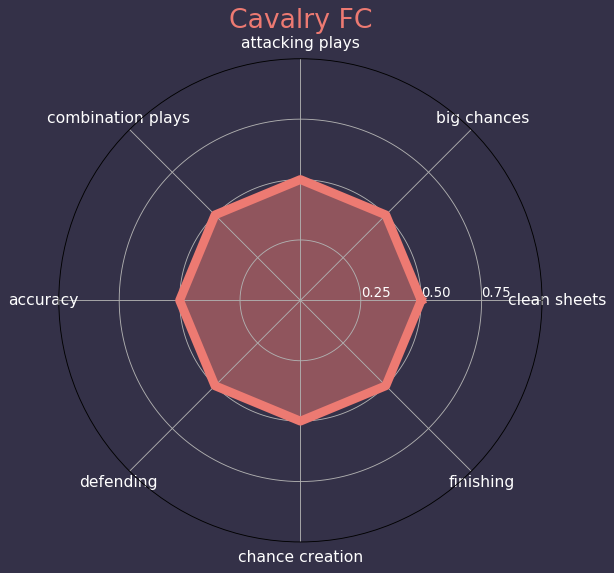

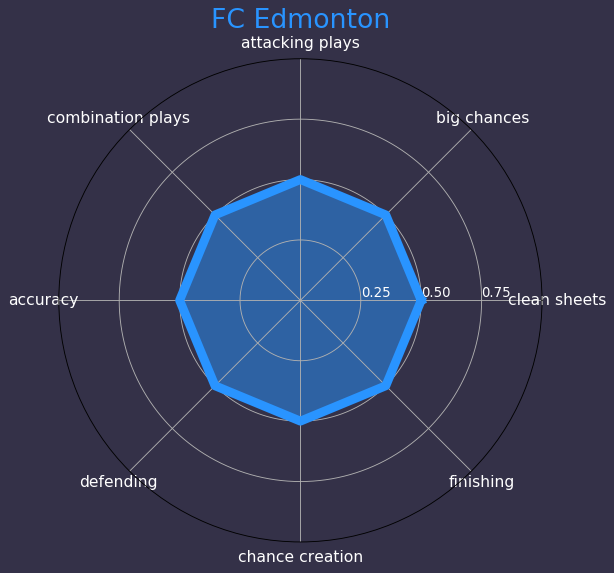

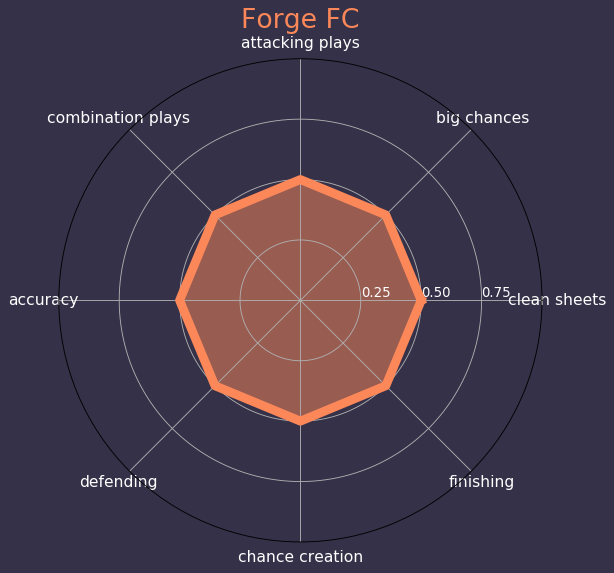

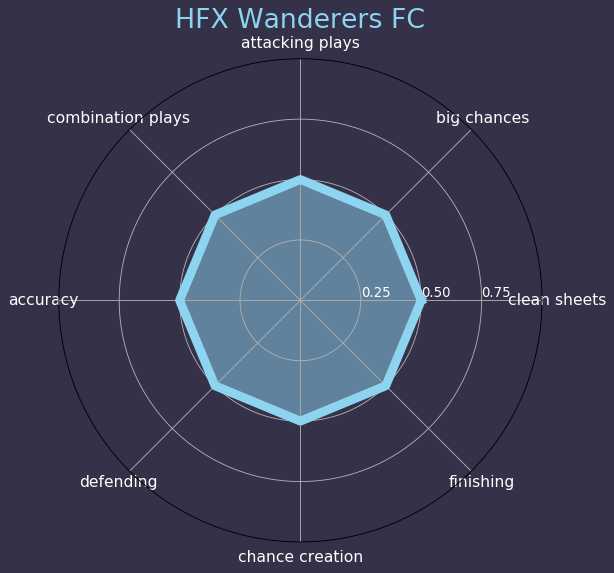

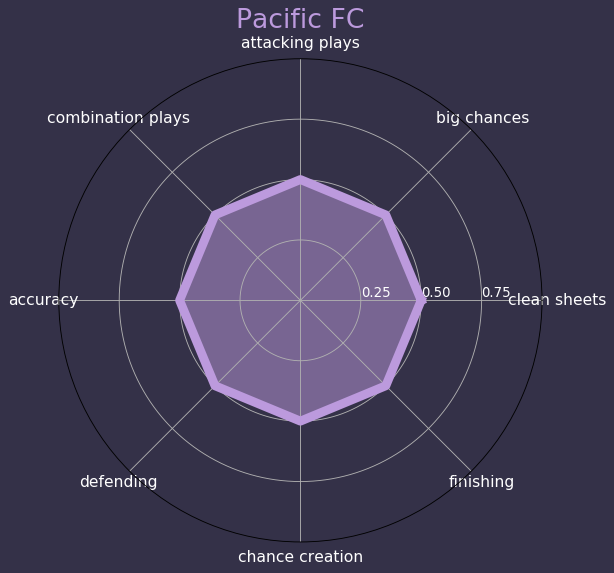

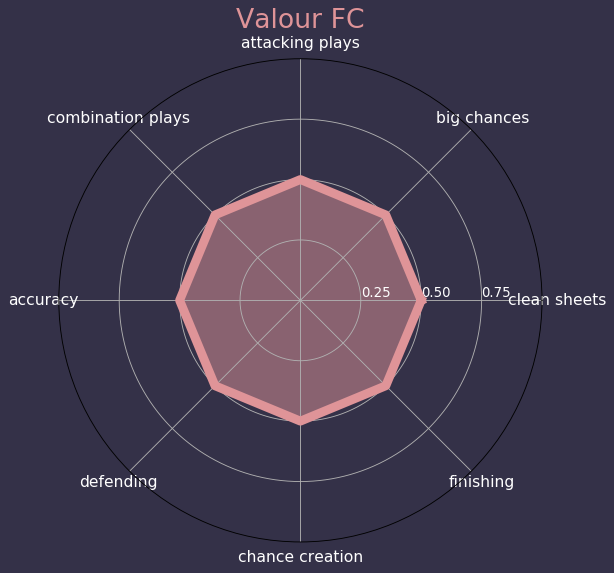

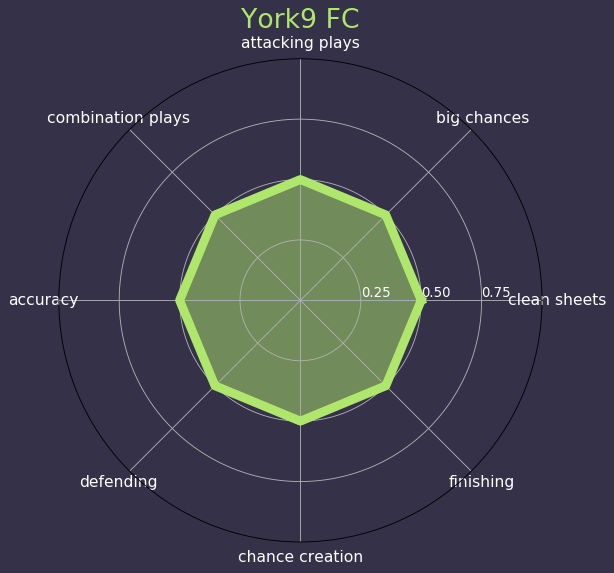

In [20]:
for i in range(team_graphs.shape[0]):
    make_radar(team_graphs.loc[i],team_ref,year)

In [21]:
compare_standings_test = cpl.compare_standings(standings,standings_old,team_ref)

In [22]:
compare_standings_test

,team,change
0,Atletico Ottawa,0
1,Cavalry FC,0
2,FC Edmonton,0
3,Forge FC,0
4,HFX Wanderers FC,0
5,Pacific FC,0
6,Valour FC,0
7,York9 FC,0


In [23]:
previous_rankings = pd.read_csv(f'datasets/{year}/cpl-{year}-power_rankings.csv')
#previous_rankings.to_csv(f'datasets/{year}/cpl-{year}-previous_rankings.csv',index=False)

In [24]:
power_rankings = cpl.get_power_rankings(standings,standings_old,team_ref,results,previous_rankings)
power_rankings

,rank,team,form,old_rank,change,goal_bonus,w_bonus,crest,colour,previous
0,1,Atletico Ottawa,0.0-0.0-0.0,1,0,0,0,Atletico_Ottawa_nav.png,cpl-ao,0
1,2,Cavalry FC,0.0-0.0-0.0,2,0,0,0,cavalry_fc_nav.png,cpl-cfc,0
2,3,FC Edmonton,0.0-0.0-0.0,3,0,0,0,FC_Edmonton_nav.png,cpl-fce,0
3,4,Forge FC,0.0-0.0-0.0,4,0,0,0,Forge_FC_nav.png,cpl-ffc,0
4,5,HFX Wanderers FC,0.0-0.0-0.0,5,0,0,0,HFX_Wanderers_FC.png,cpl-hfx,0
5,6,Pacific FC,0.0-0.0-0.0,6,0,0,0,Pacific_FC_nav.png,cpl-pfc,0
6,7,Valour FC,0.0-0.0-0.0,7,0,0,0,Valour_FC_nav.png,cpl-vfc,0
7,8,York9 FC,0.0-0.0-0.0,8,0,0,0,York_9_FC_nav.png,cpl-y9,0


In [25]:
game_week, goals, big_win, top_result, low_result,other_result = cpl.get_weeks_results(results[results['s'] <= 1],standings,team_ref)
game_week

,home,hs,away,as
0,NA,0,NA,0


In [26]:
#championship = get_standings(results,2)
#championship = championship[championship['gp'] > 1]
#championship

In [27]:
#championship.to_csv(f'datasets/{year}/cpl-{year}-championship.csv',index=False)

In [28]:
#standings.to_csv(f'datasets/{year}/cpl-{year}-standings.csv',index=False)

In [29]:
results_brief = cpl.get_results_brief(results,team_ref)

In [30]:
results_brief.head(5)

,d,m,hs,as,home,hr,away,ar,summary,team
0,7,1,0,0,Atletico Ottawa,E,HFX Wanderers FC,E,E H 0 - 0 HFX,Atletico Ottawa
1,7,1,0,0,Atletico Ottawa,E,Pacific FC,E,E H 0 - 0 PFC,Atletico Ottawa
2,7,1,0,0,Atletico Ottawa,E,York9 FC,E,E H 0 - 0 Y9,Atletico Ottawa
3,7,1,0,0,Atletico Ottawa,E,Cavalry FC,E,E H 0 - 0 CFC,Atletico Ottawa
4,7,1,0,0,Atletico Ottawa,E,York9 FC,E,E H 0 - 0 Y9,Atletico Ottawa


In [31]:
#results_brief.to_csv(f'datasets/{year}/cpl-{year}-results_brief.csv',index=False)

In [32]:
stats.head(5)

,game,team,position,number,name,first,last,minutes,touches,passes,...,clearances,interceptions,yellow,red,f-won,f-conceded,shots faced,saves,claimed crosses,cs
0,II1,Atletico Ottawa,m,0,Ajay Khabra,Ajay,Khabra,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,II1,Atletico Ottawa,m,0,Antoine Coupland,Antoine,Coupland,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,II1,Atletico Ottawa,m,0,Ben Fisk,Ben,Fisk,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,II1,Atletico Ottawa,m,0,Bernardinho,Bernardinho,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,II1,Atletico Ottawa,d,0,Brandon John,Brandon,John,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
stats.describe()

,number,minutes,touches,passes,pass-acc,crosses,cross-acc,assists,chances,goals,...,clearances,interceptions,yellow,red,f-won,f-conceded,shots faced,saves,claimed crosses,cs
count,152.000000,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,...,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
mean,9.427632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,11.555568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,16.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,77.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
team_stats = cpl.get_stats_all(stats,team_ref)

In [35]:
team_stats.describe()

,number,minutes,touches,passes,pass-acc,crosses,cross-acc,assists,chances,goals,...,clearances,interceptions,yellow,red,f-won,f-conceded,shots faced,saves,claimed crosses,cs
count,152.000000,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,...,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
mean,9.427632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,11.555568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,16.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,77.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
rated_goalscorers = cpl.top_tracked(team_stats,'goals')
rated_assists = cpl.top_tracked(team_stats,'assists')

In [37]:
rated_assists

,rank,team,name,position,number,minutes,assists
0,0,NA,NA,0,0,0,0


In [38]:
rated_assists.describe()

,rank,position,number,minutes,assists
count,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [39]:
rated_goalscorers.describe()

,rank,position,number,minutes,goals
count,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [40]:
rated_forwards = cpl.top_position(team_stats,'f')
rated_midfielders = cpl.top_position(team_stats,'m')
rated_defenders = cpl.top_position(team_stats,'d')
rated_keepers = cpl.top_position(team_stats,'g')
rated_offenders = cpl.top_offenders(team_stats)

In [41]:
rated_forwards.head(10)

,team,name,number,position,minutes,goals,chances,assists,shots,s-target,passes,crosses,duels,tackles,overall
0,NA,NA,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
rated_midfielders.head(10)

,team,name,number,position,minutes,goals,assists,touches,passes,pass-acc,crosses,cross-acc,chances,duels,tackles,overall
0,NA,NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
rated_defenders.head(10)

,team,name,number,position,minutes,tackles,t-won,clearances,interceptions,duels,d-won,overall
0,NA,NA,0,0,0,0,0,0,0,0,0,0


In [44]:
rated_keepers

,team,name,number,position,minutes,cs,saves,shots faced,claimed crosses,overall
0,NA,NA,0,0,0,0,0,0,0,0


In [45]:
rated_offenders.head(2)

,team,name,position,number,minutes,yellow,red,f-conceded
0,NA,NA,NA,0,0,0,0,0


In [46]:
best_eleven = cpl.get_best_eleven(team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
best_eleven

,image,first,last,flag,number,position,overall,link
0,Nathan-Ingham.jpg,Nathan,Ingham,Canada.png,1,g,0.93,https://en.wikipedia.org/wiki/Nathan_Ingham
1,Mélé-Temguia.jpg,Mélé,Temguia,Germany.png,8,d,0.96,https://en.wikipedia.org/wiki/Mélé_Temguia
2,Luca-Gasparotto.jpg,Luca,Gasparotto,Canada.png,13,d,0.92,https://en.wikipedia.org/wiki/Luca_Gasparotto
3,André-Bona.jpg,André,Bona,France.png,3,d,0.92,https://en.wikipedia.org/wiki/André_Bona
4,Marco-Bustos.jpg,Marco,Bustos,Canada.png,22,m,0.90,https://en.wikipedia.org/wiki/Marco_Bustos
5,Tristan-Borges.jpg,Tristan,Borges,Canada.png,4,m,0.89,https://en.wikipedia.org/wiki/Tristan_Borges
6,Julian-Buscher.jpg,Julian,Büscher,Germany.png,8,m,0.87,https://en.wikipedia.org/wiki/Julian_Büscher
7,Ryan-Telfer.jpg,Ryan,Telfer,Canada.png,18,m,0.78,https://en.wikipedia.org/wiki/Ryan_Telfer
8,Kyle-Bekker.jpg,Kyle,Bekker,Canada.png,3,m,0.77,https://en.wikipedia.org/wiki/Kyle_Bekker
9,Terran-Campbell.jpg,Terran,Campbell,Canada.png,14,f,0.79,https://en.wikipedia.org/wiki/Terran_Campbell


In [47]:
# home side
q1 = schedule.iloc[3]['home']
# away side
q2 = schedule.iloc[3]['away']
print(q1,q2)

York9 FC Valour FC


In [48]:
compare = cpl.get_team_comparison(results_brief,q1,q2)

In [49]:
compare

,d,m,hs,as,home,hr,away,ar,summary,team
0,7,1,0,0,York9 FC,E,Valour FC,E,E H 0 - 0 VFC,York9 FC
1,7,1,0,0,York9 FC,E,Valour FC,E,E H 0 - 0 VFC,York9 FC
2,7,1,0,0,Valour FC,E,York9 FC,E,E A 0 - 0 VFC,York9 FC
3,7,1,0,0,Valour FC,E,York9 FC,E,E A 0 - 0 VFC,York9 FC


In [50]:
t1_x, t1_y = cpl.get_NB_data(compare,q1)
t2_x, t2_y = cpl.get_NB_data(compare,q2)

In [51]:
home_win, draw, away_win = cpl.get_match_prediction(q1,q2,t1_x,t1_y,t2_x,t2_y)

In [52]:
print(q1,'\nwin probability: ', round(home_win,2))

York9 FC 
win probability:  0.33


In [53]:
print(q2,'\nwin probability: ', round(away_win,2))

Valour FC 
win probability:  0.33


In [54]:
print('Draw probability: ', round(draw,2))

Draw probability:  0.33


In [55]:
round(home_win + draw + away_win,1)

1.0

In [56]:
team_form_results = cpl.get_form_results(results,team_ref)
team_form_results

,index,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,27
0,Atletico Ottawa,E H 0 - 0 HFX,E H 0 - 0 PFC,E H 0 - 0 Y9,E H 0 - 0 CFC,E H 0 - 0 Y9,E H 0 - 0 CFC,E H 0 - 0 FFC,E H 0 - 0 VFC,E H 0 - 0 FCE,...,E A 0 - 0 HFX,E A 0 - 0 FCE,E A 0 - 0 FFC,E A 0 - 0 PFC,E A 0 - 0 VFC,E A 0 - 0 CFC,E A 0 - 0 Y9,E A 0 - 0 FCE,E A 0 - 0 PFC,E A 0 - 0 CFC
1,Cavalry FC,E H 0 - 0 Y9,E H 0 - 0 PFC,E H 0 - 0 Y9,E H 0 - 0 VFC,E H 0 - 0 VFC,E H 0 - 0 FFC,E H 0 - 0 FCE,E H 0 - 0 AO,E H 0 - 0 HFX,...,E A 0 - 0 AO,E A 0 - 0 HFX,E A 0 - 0 Y9,E A 0 - 0 FCE,E A 0 - 0 AO,E A 0 - 0 VFC,E A 0 - 0 Y9,E A 0 - 0 VFC,E A 0 - 0 PFC,E A 0 - 0 FFC
2,FC Edmonton,E H 0 - 0 CFC,E H 0 - 0 FFC,E H 0 - 0 PFC,E H 0 - 0 AO,E H 0 - 0 VFC,E H 0 - 0 HFX,E H 0 - 0 VFC,E H 0 - 0 CFC,E H 0 - 0 AO,...,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 CFC,E A 0 - 0 PFC,E A 0 - 0 VFC,E A 0 - 0 AO,E A 0 - 0 CFC,E A 0 - 0 AO,E A 0 - 0 FFC,E A 0 - 0 HFX
3,Forge FC,E H 0 - 0 CFC,E H 0 - 0 AO,E H 0 - 0 HFX,E H 0 - 0 VFC,E H 0 - 0 FCE,E H 0 - 0 AO,E H 0 - 0 PFC,E H 0 - 0 Y9,E H 0 - 0 PFC,...,E A 0 - 0 CFC,E A 0 - 0 VFC,E A 0 - 0 VFC,E A 0 - 0 Y9,E A 0 - 0 AO,E A 0 - 0 CFC,E A 0 - 0 FCE,E A 0 - 0 HFX,E A 0 - 0 AO,E A 0 - 0 PFC
4,HFX Wanderers FC,E H 0 - 0 AO,E H 0 - 0 CFC,E H 0 - 0 FFC,E H 0 - 0 AO,E H 0 - 0 FCE,E H 0 - 0 CFC,E H 0 - 0 Y9,E H 0 - 0 PFC,E H 0 - 0 PFC,...,E A 0 - 0 VFC,E A 0 - 0 FCE,E A 0 - 0 VFC,E A 0 - 0 CFC,E A 0 - 0 Y9,E A 0 - 0 PFC,E A 0 - 0 FFC,E A 0 - 0 AO,E A 0 - 0 FCE,E A 0 - 0 CFC
5,Pacific FC,E H 0 - 0 FCE,E H 0 - 0 HFX,E H 0 - 0 VFC,E H 0 - 0 FFC,E H 0 - 0 CFC,E H 0 - 0 VFC,E H 0 - 0 AO,E H 0 - 0 FCE,E H 0 - 0 Y9,...,E A 0 - 0 Y9,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 FCE,E A 0 - 0 CFC,E A 0 - 0 VFC,E A 0 - 0 Y9,E A 0 - 0 AO
6,Valour FC,E H 0 - 0 AO,E H 0 - 0 FCE,E H 0 - 0 HFX,E H 0 - 0 PFC,E H 0 - 0 FFC,E H 0 - 0 AO,E H 0 - 0 FFC,E H 0 - 0 HFX,E H 0 - 0 FCE,...,E A 0 - 0 PFC,E A 0 - 0 CFC,E A 0 - 0 Y9,E A 0 - 0 FCE,E A 0 - 0 FCE,E A 0 - 0 AO,E A 0 - 0 HFX,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 AO
7,York9 FC,E H 0 - 0 HFX,E H 0 - 0 VFC,E H 0 - 0 FCE,E H 0 - 0 AO,E H 0 - 0 FCE,E H 0 - 0 FFC,E H 0 - 0 VFC,E H 0 - 0 PFC,E H 0 - 0 CFC,...,E A 0 - 0 AO,E A 0 - 0 FFC,E A 0 - 0 PFC,E A 0 - 0 FCE,E A 0 - 0 VFC,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 FCE,E A 0 - 0 VFC,E A 0 - 0 PFC


In [110]:
player_info_new = cpl.update_player_info(year,player_info,rated_forwards,rated_midfielders,rated_defenders,rated_keepers)

In [61]:
standings.to_csv(f'datasets/{year}/cpl-{year}-standings.csv',index=False)
#championship.to_csv(f'datasets/{year}/cpl-{year}-championship.csv',index=False)
power_rankings.to_csv(f'datasets/{year}/cpl-{year}-power_rankings.csv',index=False)
results_brief.to_csv(f'datasets/{year}/cpl-{year}-results_brief.csv',index=False)
schedule.to_csv(f'datasets/{year}/cpl-{year}-schedule.csv',index=False)
team_stats.to_csv(f'datasets/{year}/cpl-{year}-team_stats.csv',index=False)

In [62]:
rated_forwards.to_csv(f'datasets/{year}/cpl-{year}-forwards.csv',index=False)
rated_midfielders.to_csv(f'datasets/{year}/cpl-{year}-midfielders.csv',index=False)
rated_defenders.to_csv(f'datasets/{year}/cpl-{year}-defenders.csv',index=False)
rated_keepers.to_csv(f'datasets/{year}/cpl-{year}-keepers.csv',index=False)
rated_offenders.to_csv(f'datasets/{year}/cpl-{year}-discipline.csv',index=False)
rated_goalscorers.to_csv(f'datasets/{year}/cpl-{year}-rated_goalscorers.csv',index=False)
rated_assists.to_csv(f'datasets/{year}/cpl-{year}-rated_assists.csv',index=False)

In [30]:
team_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)
#h1_roster.to_csv(f'datasets/{year}/teams/cpl-{year}-{q1}_final_scores.csv')
team_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)
best_eleven.to_csv(f'datasets/{year}/cpl-{year}-best_eleven.csv',index=False)
player_info_new.to_csv(f'datasets/{year}/player-{year}-info.csv',index=False)

"team_stats.to_csv(f'datasets/{year}/cpl-{year}-team_stats.csv',index=False)\nrated_forwards.to_csv(f'datasets/{year}/cpl-{year}-forwards.csv',index=False)\nrated_midfielders.to_csv(f'datasets/{year}/cpl-{year}-midfielders.csv',index=False)\nrated_defenders.to_csv(f'datasets/{year}/cpl-{year}-defenders.csv',index=False)\nrated_keepers.to_csv(f'datasets/{year}/cpl-{year}-keepers.csv',index=False)\nrated_offenders.to_csv(f'datasets/{year}/cpl-{year}-discipline.csv',index=False)\nrated_goalscorers.to_csv(f'datasets/{year}/cpl-{year}-rated_goalscorers.csv',index=False)\nrated_assists.to_csv(f'datasets/{year}/cpl-{year}-rated_assists.csv',index=False)\nteam_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)\n#h1_roster.to_csv(f'datasets/{year}/teams/cpl-{year}-{q1}_final_scores.csv')\nteam_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)\nbest_eleven.to_csv(f'datasets/{year}/cpl-{year}-best_eleven.csv',index=False)\nplayer_info.to_csv(f'

In [54]:
# home side
q1 = schedule.iloc[3]['home']
# away side
q2 = schedule.iloc[3]['away']
print(q1,q2)

York9 FC Valour FC


In [55]:
game_info = schedule[schedule['home'] == q1]
game_info = game_info[game_info['away'] == q2]
game_info

,game,home,away
3,II4,York9 FC,Valour FC
38,II39,York9 FC,Valour FC


In [56]:
game_h = cpl.get_home_away_comparison(stats,game_info,q1)
game_a = cpl.get_home_away_comparison(stats,game_info,q2)

/home/todd/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [57]:
h1_roster = cpl.get_compare_roster(results,q1,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
h1_roster

,name,number,position,overall
0,Colm Vance,31,g,0.0
1,Diyaeddine Abzi,20,d,0.0
2,Fugo Segawa,0,d,0.0
3,Luca Gasparotto,13,d,0.0
4,Matthew Arnone,0,d,0.0
5,Brian López,0,m,0.0
6,Chris Mannella,0,m,0.0
7,Emilio Estevez,11,m,0.0
8,Joseph DiChiara,8,m,0.0
9,Adrián Ugarriza,0,f,0.0


In [58]:
h2_roster = cpl.get_compare_roster(results,q2,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
h2_roster

,name,number,position,overall
0,James Pantemis,0,g,0.0
1,Amir Soto,0,d,0.0
2,Andrew Jean-Baptiste,0,d,0.0
3,Arnold BoukaMoutou,0,d,0.0
4,Raphaël Garcia,2,d,0.0
5,Brett Levis,0,m,0.0
6,Diego Gutiérrez,8,m,0.0
7,Dylan Carreiro,10,m,0.0
8,Fraser Aird,0,m,0.0
9,Daryl Fordyce,0,f,0.0


In [59]:
team1_history = cpl.get_team_history(results,q1)
team1_history

,d,m,hs,as,home,hr,away,ar
90,7,1,0,0,York9 FC,E,Forge FC,E
97,7,1,0,0,York9 FC,E,HFX Wanderers FC,E
102,7,1,0,0,York9 FC,E,FC Edmonton,E
104,7,1,0,0,York9 FC,E,Valour FC,E
111,7,1,0,0,York9 FC,E,Pacific FC,E


In [60]:
team1_history = cpl.get_five_game_form(results,q1)

In [61]:
team1_history

,0
w,0.0
l,0.0
d,0.0


In [62]:
for i in team1_history:
    if i == 'W':
        print(3)
    if i == 'L':
        print(0)
    if i == 'D':
        print(1)

In [63]:
team2_history = cpl.get_team_history(results,q2)
team2_history

,d,m,hs,as,home,hr,away,ar
76,7,1,0,0,Valour FC,E,Atletico Ottawa,E
83,7,1,0,0,Valour FC,E,HFX Wanderers FC,E
96,7,1,0,0,Valour FC,E,Forge FC,E
100,7,1,0,0,Valour FC,E,HFX Wanderers FC,E
110,7,1,0,0,Valour FC,E,Atletico Ottawa,E
